In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from fashion_mnist.utils.mnist_reader import load_mnist

In [3]:
total_train_image, total_train_labels = load_mnist('./fashion_mnist/data/fashion/', kind='train')
test_image, test_labels = load_mnist('./fashion_mnist/data/fashion/', kind='t10k')

In [4]:
ones_array_train = np.ones((total_train_image.shape[0], 1), dtype=int)
ones_array_test = np.ones((test_image.shape[0], 1), dtype=int)

In [5]:
total_train_image = np.hstack((ones_array_train,total_train_image))
test_image = np.hstack((ones_array_test,test_image))

In [6]:
train_image, validation_image = train_test_split(total_train_image, test_size=0.15, random_state=0)
train_labels, validation_labels = train_test_split(total_train_labels, test_size=0.15, random_state=0)

In [7]:
train_labels_onehot = pd.get_dummies(train_labels)
validation_labels_onehot = pd.get_dummies(validation_labels)
test_labels_onehot = pd.get_dummies(test_labels)

In [8]:
def cross_entropy(y, h):
    return tf.reduce_mean(tf.reduce_sum(-tf.log(h)*y,1, keepdims=True))

def gradient_update(gradient,h):
    return gradient.assign(tf.tensordot(tf.transpose(X), tf.subtract(h, y),1))

def theta_update(theta, gradient):
    return theta.assign(theta - lr * gradient)

def pred_y(X,theta):
    return tf.tensordot(X,theta, 1)

def softmax(z):
    exp_num = tf.exp(z)
    sum_div = tf.reduce_sum(exp_num,1, keepdims=True)
    return exp_num / sum_div

In [9]:
#sess.run(cross_entropy([[0,1],[1,0]],[[0.5,0.8],[0.9,0.1]]))

In [10]:
#(tf.tensordot(tf.transpose(X), tf.subtract(h, y),1)/tf.cast(tf.shape(h)[0], dtype=tf.float32)).shape

In [11]:
#sess.run(tf.subtract(h, y),feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot[index:index+batch]})

In [12]:
lr = 0.000001
batch = train_image.shape[0]
epochs = 200
iterations = int(train_image.shape[0]/batch)

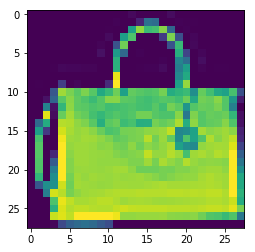

In [13]:
plt.imshow(test_image[30][1:].reshape(28,28))

In [14]:
X = tf.placeholder(tf.float32, shape =([None,28*28+1]))
y = tf.placeholder(tf.float32, shape =([None, 10]))

In [15]:
theta = tf.get_variable("theta", shape=(28*28+1,10), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [16]:
gradient = tf.get_variable("gradient", shape=(28*28+1,10), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [17]:
z = pred_y(X,theta)

In [18]:
h = softmax(z)

In [19]:
loss = cross_entropy(y,h)

In [20]:
tf_X = tf.placeholder(tf.float32)
tf_X_norm = tf.image.per_image_standardization(tf_X)

In [21]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)

train_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: train_image})
validation_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: validation_image})
test_image_norm = sess.run(tf_X_norm, feed_dict={tf_X: test_image})

In [22]:
sess.run(tf.global_variables_initializer())

train_epoch_loss_list = []
validation_epoch_loss_list = []

for i in range(epochs):
    batch_accumulate_loss = 0
    
    print('Epoch {}'.format(i))
    for j in range(iterations):
        index = j*batch

        theta_value = sess.run(theta_update(theta,gradient))
        y_values, h_values, gradient_values, train_loss_value = sess.run([y, h, gradient_update(gradient, h), loss], feed_dict={X:train_image_norm[index:index+batch], y:train_labels_onehot[index:index+batch]})
        batch_accumulate_loss += train_loss_value

    train_epoch_loss = batch_accumulate_loss/iterations
    train_epoch_loss_list.append(train_epoch_loss)
    validation_epoch_loss = sess.run(loss, feed_dict={X:validation_image_norm, y:validation_labels_onehot})
    validation_epoch_loss_list.append(validation_epoch_loss)

    print('Iteration loss:')
    print(train_epoch_loss)
    print('Validation loss:')
    print(validation_epoch_loss)

Epoch 0
Iteration loss:
3.9210357666015625
Validation loss:
3.9119883
Epoch 1
Iteration loss:
2.64412260055542
Validation loss:
2.6722696
Epoch 2
Iteration loss:
1.925763487815857
Validation loss:
1.9386044
Epoch 3
Iteration loss:
1.4481805562973022
Validation loss:
1.4530989
Epoch 4
Iteration loss:
1.3005329370498657
Validation loss:
1.2959244
Epoch 5
Iteration loss:
1.1905730962753296
Validation loss:
1.1948919
Epoch 6
Iteration loss:
1.1304725408554077
Validation loss:
1.12649
Epoch 7
Iteration loss:
1.0711610317230225
Validation loss:
1.0751628
Epoch 8
Iteration loss:
1.0382180213928223
Validation loss:
1.0351053
Epoch 9
Iteration loss:
0.9924830198287964
Validation loss:
0.99577194
Epoch 10
Iteration loss:
0.9722074270248413
Validation loss:
0.9696681
Epoch 11
Iteration loss:
0.9368069767951965
Validation loss:
0.93931824
Epoch 12
Iteration loss:
0.9233856201171875
Validation loss:
0.92116296
Epoch 13
Iteration loss:
0.8942965865135193
Validation loss:
0.89602464
Epoch 14
Iteratio

Iteration loss:
0.5460287928581238
Validation loss:
0.5415598
Epoch 116
Iteration loss:
0.5453266501426697
Validation loss:
0.54087365
Epoch 117
Iteration loss:
0.5446327924728394
Validation loss:
0.54019356
Epoch 118
Iteration loss:
0.543947160243988
Validation loss:
0.53952366
Epoch 119
Iteration loss:
0.5432693958282471
Validation loss:
0.53886014
Epoch 120
Iteration loss:
0.5425995588302612
Validation loss:
0.5382059
Epoch 121
Iteration loss:
0.5419373512268066
Validation loss:
0.53755826
Epoch 122
Iteration loss:
0.5412826538085938
Validation loss:
0.5369192
Epoch 123
Iteration loss:
0.5406352877616882
Validation loss:
0.5362867
Epoch 124
Iteration loss:
0.5399951934814453
Validation loss:
0.53566223
Epoch 125
Iteration loss:
0.5393621325492859
Validation loss:
0.53504425
Epoch 126
Iteration loss:
0.5387360453605652
Validation loss:
0.5344337
Epoch 127
Iteration loss:
0.5381167531013489
Validation loss:
0.53382975
Epoch 128
Iteration loss:
0.5375040769577026
Validation loss:
0.533

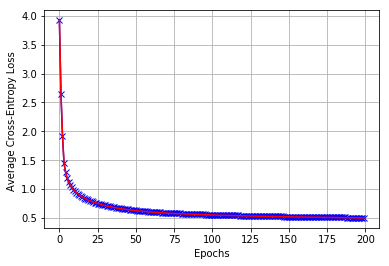

In [23]:
fig = plt.figure(1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Average Cross-Entropy Loss ')
plt.plot(range(len(train_epoch_loss_list)),train_epoch_loss_list, '-bx')
plt.plot(range(len(validation_epoch_loss_list)),validation_epoch_loss_list, '-r')

plt.show()

In [24]:
h_values = sess.run(h, feed_dict={X:test_image_norm})

In [25]:
result_labels = np.zeros_like(h_values,dtype=int)

In [26]:
result_labels[np.arange(len(h_values)), h_values.argmax(1)] = 1

In [27]:
result_labels = np.argmax(result_labels, axis=1)

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1_score(test_labels,result_labels, average='micro')

0.81

In [30]:
from pandas_ml import ConfusionMatrix

In [31]:
ConfusionMatrix(test_labels,result_labels)

Predicted     0    1    2     3     4    5    6     7    8     9  __all__
Actual                                                                   
0           790    2   18    63     4   10   97     0   15     1     1000
1             7  930    8    39     8    0    7     0    1     0     1000
2            17    1  691    13   147    2  119     0   10     0     1000
3            31   12    8   845    36    1   61     0    6     0     1000
4             2    2  103    39   730    3  111     0    9     1     1000
5             1    1    0     2     0  878    0    69    7    42     1000
6           159    5  126    48   113   10  508     0   30     1     1000
7             0    0    0     0     0   49    0   891    0    60     1000
8             3    1   17    12     2   19   24     9  911     2     1000
9             0    0    0     0     0   27    3    43    1   926     1000
__all__    1010  954  971  1061  1040  999  930  1012  990  1033    10000